In [3]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = load_wine()['data']
y = load_wine()['target']
labels = load_wine()['feature_names']

lb = LabelBinarizer()
y1 = lb.fit_transform(y)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [6]:
dtC = DecisionTreeClassifier(max_depth = 1)
dtC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [7]:
from sklearn.metrics import accuracy_score

dtC_tr = accuracy_score(y_train, dtC.predict(X_train))
dtC_test = accuracy_score(y_test, dtC.predict(X_test))

In [8]:
print(dtC_tr,' ',dtC_test)

0.717741935483871   0.6296296296296297


In [9]:
from sklearn.ensemble import AdaBoostClassifier



In [10]:
ada = AdaBoostClassifier(base_estimator=dtC, n_estimators=50,learning_rate=0.5, algorithm='SAMME.R',random_state=1)
ada.fit(X_train,y_train)

c:\Users\stran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, random_state=1)

In [11]:
ada_tr = accuracy_score(y_train, ada.predict(X_train))
ada_test = accuracy_score(y_test, ada.predict(X_test))

In [12]:
print(ada_tr,' ',ada_test)

1.0   0.9814814814814815


In [13]:
import pandas as pd

In [14]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [15]:
df = pd.read_excel('/content/default of credit card clients.xls')

FileNotFoundError: [Errno 2] No such file or directory: '/content/default of credit card clients.xls'

In [35]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [107]:
X=df.iloc[1:,1:-1]

In [108]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29999,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [109]:
y = df.iloc[1:,-1].values

In [110]:
#y = y[1:]
#y[0] = 1

In [111]:
y = y.astype(int)

In [112]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [113]:
X.shape

(30000, 23)

In [114]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [117]:
#from sklearn.metrics import accuracy_score

dtC2 = DecisionTreeClassifier(max_depth = 1)
dtC2.fit(X_train, y_train)

dtC2_tr = accuracy_score(y_train, dtC2.predict(X_train))
dtC2_test = accuracy_score(y_test, dtC2.predict(X_test))

In [118]:
dtC2_test = accuracy_score(y_test, dtC2.predict(X_test))

In [119]:
print(dtC2_tr,' ',dtC2_test)

0.8175714285714286   0.8241111111111111


AttributeError: ignored

In [120]:
ada2 = AdaBoostClassifier(base_estimator=dtC2, n_estimators=50,learning_rate=0.5, algorithm='SAMME.R',random_state=1)
ada2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, random_state=1)

In [121]:
ada2_tr = accuracy_score(y_train, ada2.predict(X_train))
ada2_test = accuracy_score(y_test, ada2.predict(X_test))

In [122]:
print(ada2_tr,' ',ada2_test)

0.8167142857142857   0.8208888888888889


In [140]:
import numpy as np


n = np.array(range(5,105,5))
z = []

In [141]:
n

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100])

In [142]:
for i in n:
  ada3 = AdaBoostClassifier(base_estimator=dtC2, n_estimators=i,learning_rate=0.5, algorithm='SAMME.R',random_state=1)
  ada3.fit(X_train,y_train)
  ada3_test = accuracy_score(y_test, ada3.predict(X_test))
  z.append(ada3_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [143]:
z

[0.8163333333333334,
 0.8202222222222222,
 0.8195555555555556,
 0.8192222222222222,
 0.8186666666666667,
 0.8196666666666667,
 0.8196666666666667,
 0.8196666666666667,
 0.8193333333333334,
 0.8208888888888889,
 0.8203333333333334,
 0.8197777777777778,
 0.8198888888888889,
 0.8196666666666667,
 0.8197777777777778,
 0.8197777777777778,
 0.82,
 0.82,
 0.8196666666666667,
 0.82]

In [145]:
import matplotlib.pyplot as plt


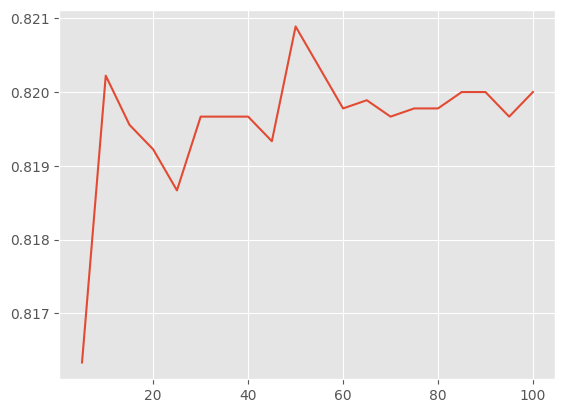

In [148]:
plt.style.use('ggplot')

plt.plot(n,z)

In [157]:
n = np.linspace(0,1,10)

In [158]:
n

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [159]:
z = []

In [160]:
for i in range(1,len(n)):
  ada3 = AdaBoostClassifier(base_estimator=dtC2, n_estimators=50,learning_rate=n[i], algorithm='SAMME.R',random_state=1)
  ada3.fit(X_train,y_train)
  ada3_test = accuracy_score(y_test, ada3.predict(X_test))
  z.append(ada3_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

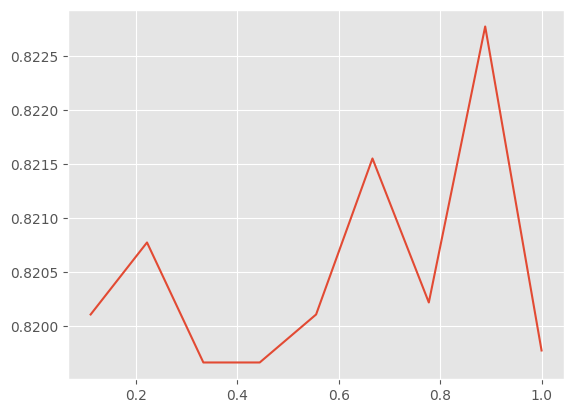

In [161]:
plt.style.use('ggplot')

plt.plot(n[1:],z)